<a href="https://colab.research.google.com/github/MaidanchukIrina/Portfolio/blob/main/ADS_costs%2C_heat_map%2C_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
fb_ads_campaign=pd.read_csv(r'C:\Users\User\Downloads\facebook_ads_data (1).csv')




In [7]:
fb_ads_campaign.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [20]:
fb_ads_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ad_date            1494 non-null   datetime64[ns]
 1   campaign_name      1494 non-null   object        
 2   total_spend        1494 non-null   float64       
 3   total_impressions  1494 non-null   int64         
 4   total_clicks       1494 non-null   int64         
 5   total_value        1494 non-null   float64       
 6   cpc                1443 non-null   float64       
 7   cpm                1462 non-null   float64       
 8   ctr                1462 non-null   float64       
 9   romi               1462 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 116.8+ KB


1. Зроби групування даних по дням та для згрупованих даних побудуй два графіки:
Графік з щоденною сумою витрат на рекламу в 2021 році;
Графік з щоденним ROMI в 2021 році.

In [43]:
fb_ads_campaign['ad_date'] = pd.to_datetime(fb_ads_campaign['ad_date'])

In [44]:
df_2021 = fb_ads_campaign[fb_ads_campaign['ad_date'].dt.year == 2021]

In [54]:
df_grouped = df_2021.groupby(fb_ads_campaign['ad_date'].dt.date)['total_spend'].sum().reset_index()

In [63]:
df_grouped_2 = df_2021.groupby(fb_ads_campaign['ad_date'].dt.date)['romi'].mean().reset_index()

In [71]:
df_sorted = df_grouped.sort_values(by='ad_date')

In [78]:
df_sorted_2 = df_grouped_2.sort_values(by='ad_date')

In [84]:
df_sorted.head()

,ad_date,total_spend
0,2021-01-01,0.39
1,2021-01-02,7.74
2,2021-01-04,70.06
3,2021-01-05,81.15
4,2021-01-06,142.77


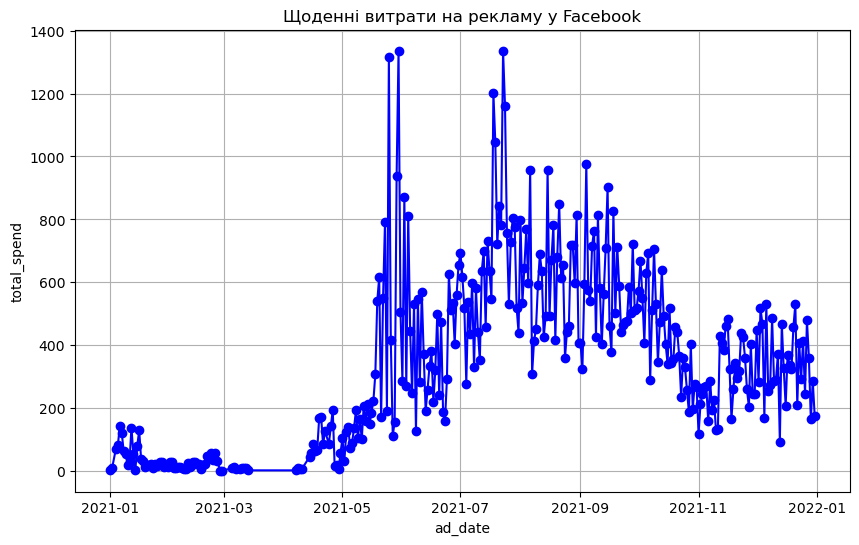

In [89]:
# Побудова графіка 1
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['ad_date'], df_sorted['total_spend'], marker='o', linestyle='-', color='b')

# Налаштування вісей та заголовка
plt.xlabel('ad_date')
plt.ylabel('total_spend')
plt.title('Щоденні витрати на рекламу у Facebook')

# Додавання сітки
plt.grid(True)

# Відображення графіка
plt.show()

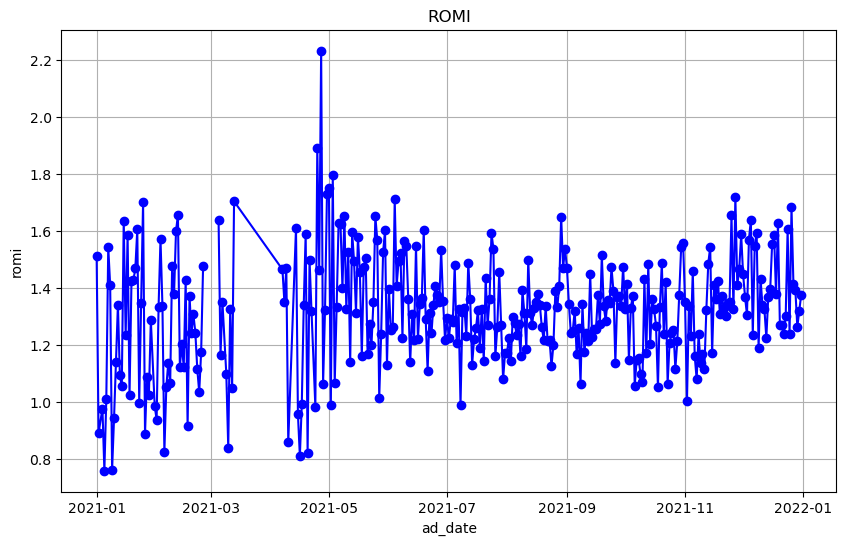

In [93]:
# Побудова графіка 2
plt.figure(figsize=(10, 6))
plt.plot(df_sorted_2['ad_date'], df_sorted_2['romi'], marker='o', linestyle='-', color='b')

# Налаштування вісей та заголовка
plt.xlabel('ad_date')
plt.ylabel('romi')
plt.title('ROMI')

# Додавання сітки
plt.grid(True)

# Відображення графіка
plt.show()

2. Зроби групування даних за назвою кампанії побудуй два графіки:
Графік загальної суми витрат на рекламу в кожній з кампаній;
Загальний ROMI в кожній з кампаній.

In [96]:
df_campaign_grouped = df_2021.groupby('campaign_name').agg({'total_spend': 'sum', 'romi': 'mean'}).reset_index()

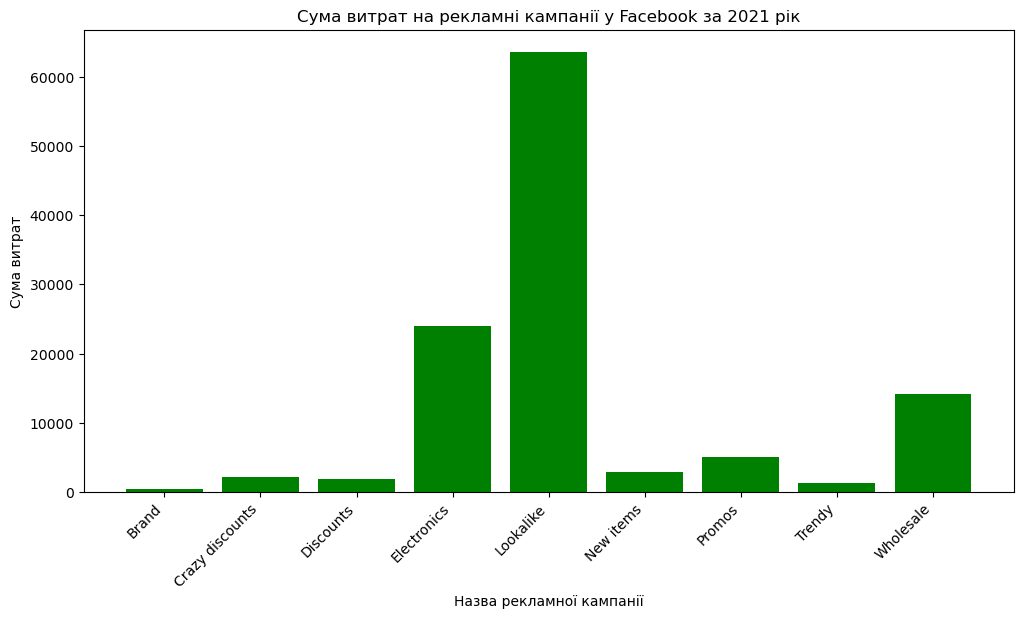

In [100]:
# Побудова графіка 1
plt.figure(figsize=(12, 6))
plt.bar(df_campaign_grouped['campaign_name'], df_campaign_grouped['total_spend'], color='g')

# Налаштування вісей та заголовка
plt.xlabel('Назва рекламної кампанії')
plt.ylabel('Сума витрат')
plt.title('Сума витрат на рекламні кампанії у Facebook за 2021 рік')

# Повернення назв кампаній на осі X для зручності
plt.xticks(rotation=45, ha='right')

# Відображення графіка
plt.show()

Text(0.5, 1.0, 'Середній ROMI на рекламні кампанії у Facebook за 2021 рік')

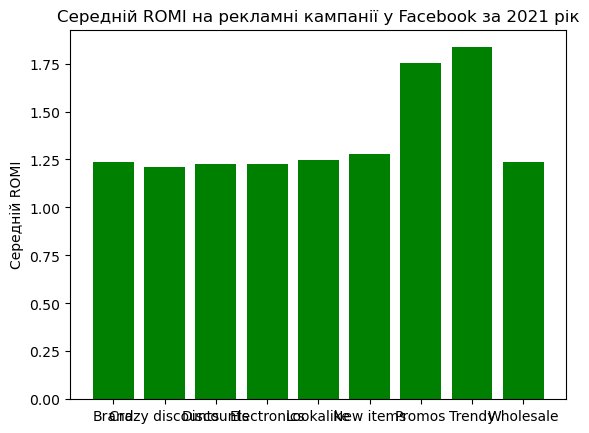

In [109]:
# Побудова графіка середнього ROMI
plt.subplot(1, 1, 1)
plt.bar(df_campaign_grouped['campaign_name'], df_campaign_grouped['romi'], color='g')
plt.xlabel('')
plt.ylabel('Середній ROMI')
plt.title('Середній ROMI на рекламні кампанії у Facebook за 2021 рік')

3. За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)

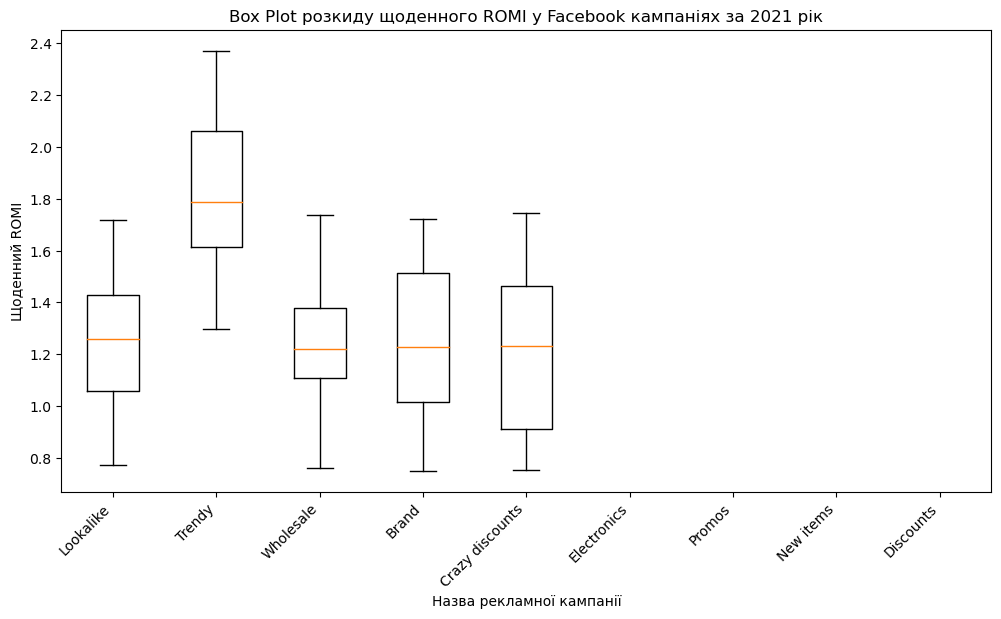

In [117]:
plt.figure(figsize=(12, 6))
plt.boxplot([df_2021[df_2021['campaign_name'] == campaign]['romi'] for campaign in df_2021['campaign_name'].unique()],
            labels=df_2021['campaign_name'].unique())
plt.xlabel('Назва рекламної кампанії')
plt.ylabel('Щоденний ROMI')
plt.title('Box Plot розкиду щоденного ROMI у Facebook кампаніях за 2021 рік')
plt.xticks(rotation=45, ha='right')
plt.show()

4. Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

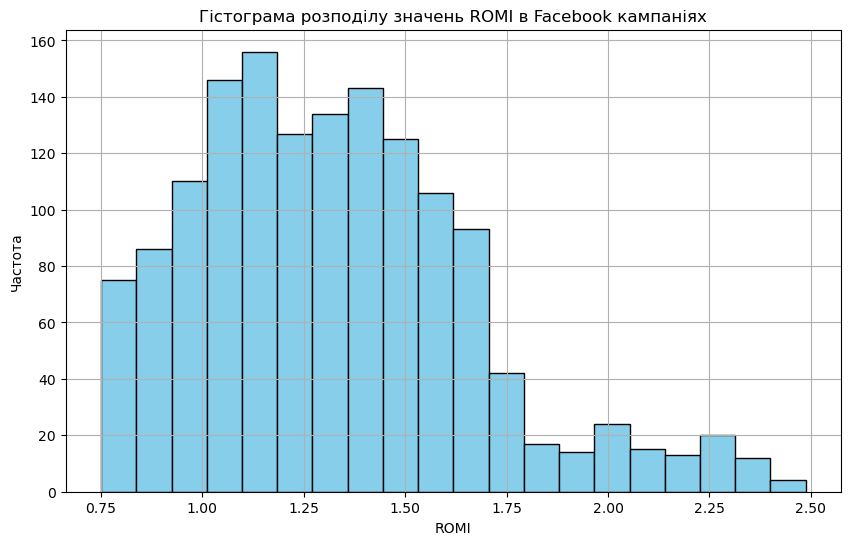

In [130]:
plt.figure(figsize=(10, 6))
plt.hist(fb_ads_campaign['romi'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('ROMI')
plt.ylabel('Частота')
plt.title('Гістограма розподілу значень ROMI в Facebook кампаніях')
plt.grid(True)
plt.show()

5. Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?

In [136]:
fb_ads_campaign['ad_date'] = pd.to_datetime(fb_ads_campaign['ad_date'], errors='coerce')

In [141]:
fb_ads_campaign_without_expansion = fb_ads_campaign.drop(columns=['campaign_name'])

In [145]:
fb_ads_campaign_without_expansion.head()

,ad_date,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


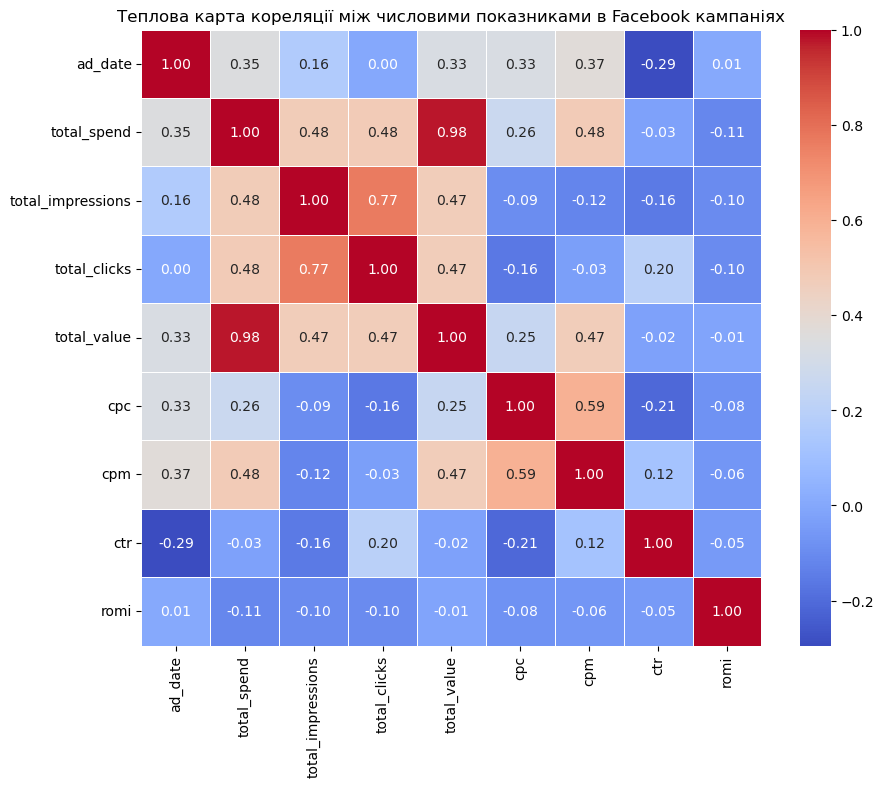

Показник з найвищою кореляцією з 'total_value': total_spend (0.98)
Показник з найнижчою кореляцією з 'total_value': ctr (-0.02)


In [148]:
# Виведення теплової карти кореляції
correlation_matrix = fb_ads_campaign_without_expansion.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Теплова карта кореляції між числовими показниками в Facebook кампаніях')
plt.show()

# Знаходження показників з найвищою та найнижчою кореляцією з "total_value"
correlation_with_total_value = correlation_matrix['total_value'].sort_values(ascending=False)
highest_correlation = correlation_with_total_value.index[1]  # Перший показник, оскільки total_value має кореляцію 1 з собою
lowest_correlation = correlation_with_total_value.index[-1]

print(f"Показник з найвищою кореляцією з 'total_value': {highest_correlation} ({correlation_with_total_value[highest_correlation]:.2f})")
print(f"Показник з найнижчою кореляцією з 'total_value': {lowest_correlation} ({correlation_with_total_value[lowest_correlation]:.2f})")

6. Побудуй точкову діаграму з лінійною регресією (для цього ти можеш використати функцію lmplot()), що побудована на даних з "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.

c:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


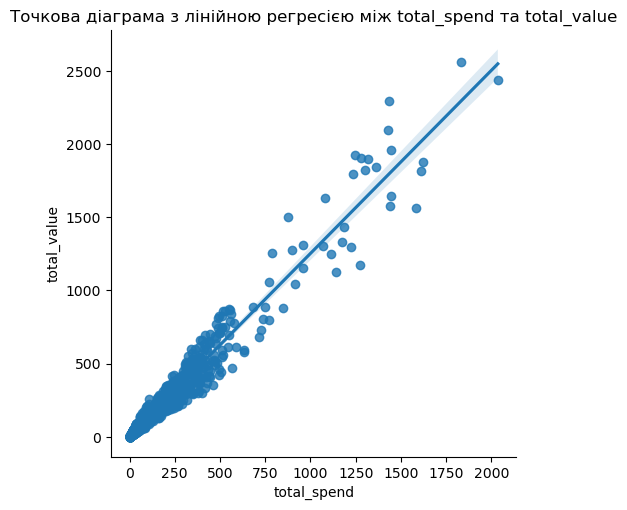

In [150]:
sns.lmplot(x='total_spend', y='total_value', data=fb_ads_campaign)
plt.title('Точкова діаграма з лінійною регресією між total_spend та total_value')
plt.show()

Ключові Результати та Інтерпретація

Щоденні витрати на рекламу: Графік щоденних витрат за 2021 рік дозволяє спостерігати динаміку витрат, показуючи, що певні дні мали значно вищі витрати, ймовірно, через збільшення рекламних кампаній або сезонні активації. Загалом витрати мають тенденцію до підвищення в певні періоди, що може відображати маркетингову стратегію.

Щоденний ROMI: 

Графік щоденного ROMI демонструє, як змінювалася рентабельність інвестицій у рекламу протягом року. Були дні з підвищеним ROMI, що свідчить про високу ефективність кампаній у ці дні. Такі піки можуть бути пов’язані з особливими маркетинговими заходами або святковими періодами, що сприяли залученню більшої аудиторії.

Кореляція між витратами та вартістю: 

Регресійний аналіз показує позитивну кореляцію між загальними витратами на рекламу та загальною вартістю (total_value), що вказує на те, що збільшення витрат на рекламу може призвести до більшої віддачі. Однак, співвідношення не є ідеальним, що свідчить про можливі обмеження у збільшенні ефективності лише за рахунок витрат – необхідно враховувати й інші фактори, що впливають на результативність кампаній.